In [69]:
from matplotlib import ticker
import sys
sys.path.append('..')
from sklearn.model_selection import train_test_split

import numpy as np
import pickle
from scipy.io import savemat
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from tqdm import tqdm
import random
from modeling  import Code2EEG
from utils import codeDistance
import pandas as pd
import os

In [70]:
expName = 'diode'

srate = 250
winLEN = 1

tmin=0
tmax = 0.3

key = 'WN'
dir = '../datasets/%s.pickle' % expName
with open(dir, "rb") as fp:
    wholeset = pickle.load(fp)

sub = wholeset[0]
chnNames = ['OZ']
chnINX = [sub['channel'].index(i) for i in chnNames]
X = sub[key]['X'][:, chnINX]
y = sub[key]['y']
S = sub[key]['STI']
_class = np.unique(y).tolist()
sub['name']

'diode'

In [71]:
picked = X[:120]
picked = np.transpose(picked,(1,-1,0))

STI = S.T

s = {
    'pattern':picked,
    'stimulus':STI
    'name':'diode'
}

SS = {
    'S001':s
}

savemat('../seqOpt/mat/diode.mat',SS)

In [47]:
from modeling import Code2EEG
code2EEG = Code2EEG(srate=srate,winLEN=winLEN,tmin=tmin,tmax=tmax,S=(S,np.unique(y)),estimator=0.98,padding=True,n_band=1,component=1)
code2EEG.fit(X,y)

TypeError: only integer scalar arrays can be converted to a scalar index

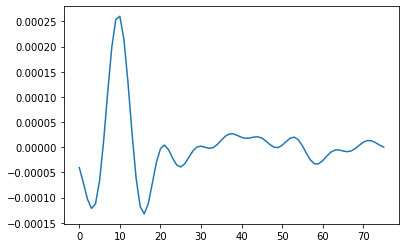

In [ ]:
plt.plot(code2EEG.trf[0])